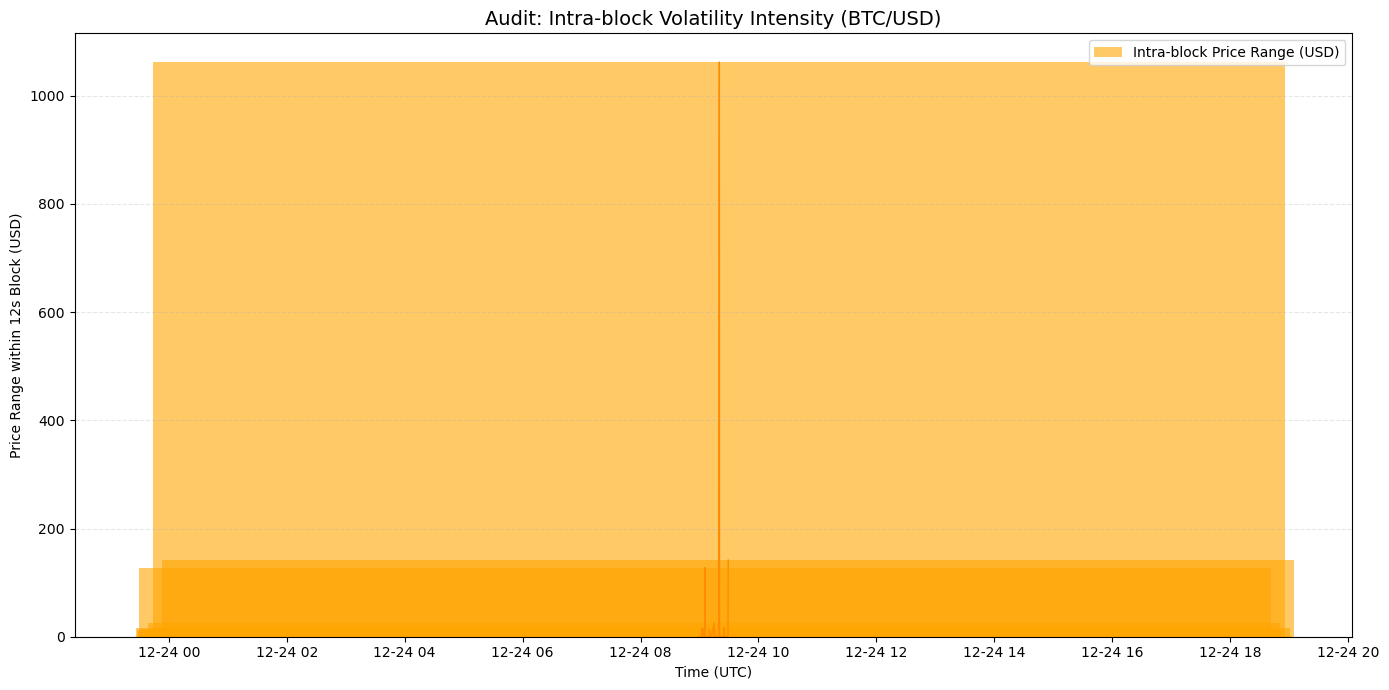

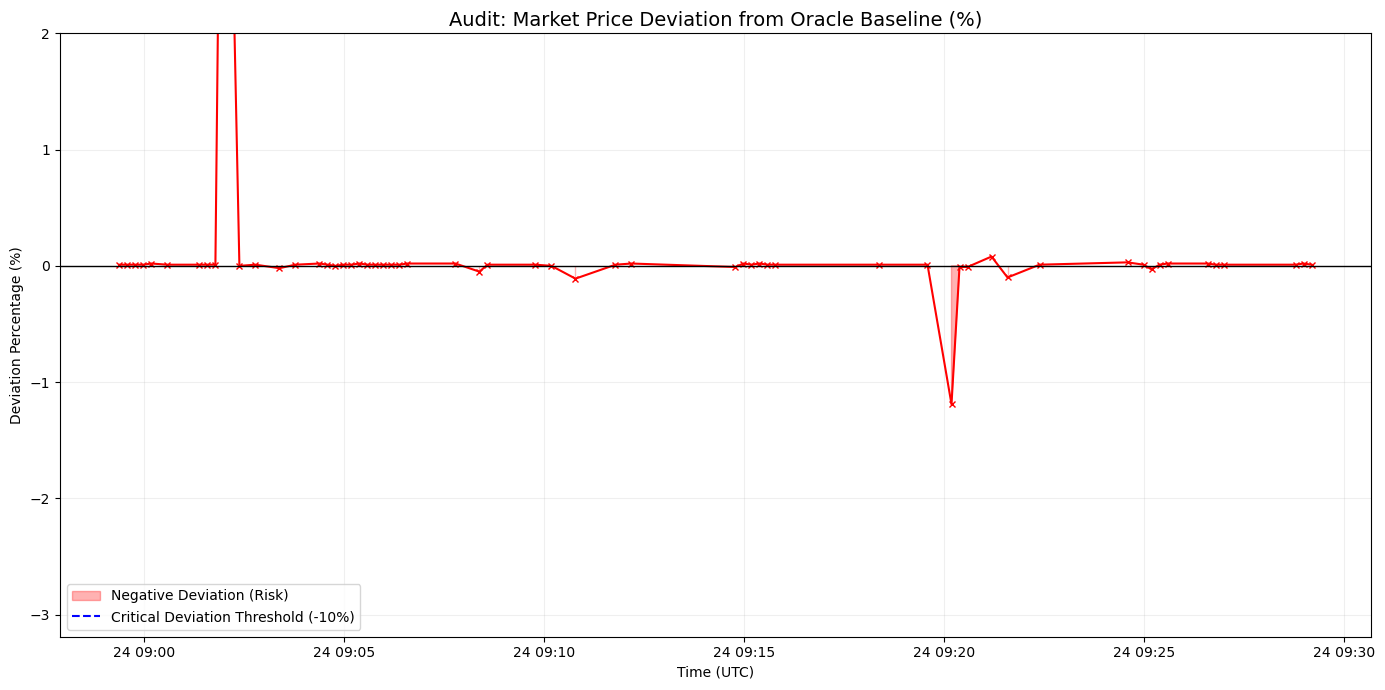

Audit plots generated successfully using 03_deviation_audit.csv.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load Data Source ---
# File name updated as requested
df_summary = pd.read_csv('03_deviation_audit.csv')

# --- 2. Robust Timestamp Normalization ---
# This improved function prevents double-prepending the date
def fix_timestamp(t):
    t = str(t).strip()
    
    # Check if the date "2025" is already present to avoid duplication errors
    if '2025' in t:
        return t
        
    # Handle truncated "MM:SS.f" format (e.g., "29:11.0")
    if len(t.split(':')) == 2:
        # Standardizing to hour 09 based on audit window
        return f"2025-12-24 09:{t}"
    
    # Fallback for other formats
    return f"2025-12-24 {t}"

# Apply robust fix
df_summary['BLOCK_TIMESTAMP'] = pd.to_datetime(df_summary['BLOCK_TIMESTAMP'].apply(fix_timestamp))

# Sort chronologically by blockchain height
df_summary = df_summary.sort_values('BLOCK_NUMBER')

# --- 3. Visualization: Intra-block Volatility Intensity ---
# "Chaos Gauge": Measures absolute price swings (Max-Min) within a single 12s block.
plt.figure(figsize=(14, 7))
plt.bar(df_summary['BLOCK_TIMESTAMP'], df_summary['PRICE_RANGE'], 
        color='orange', alpha=0.6, label='Intra-block Price Range (USD)')
plt.plot(df_summary['BLOCK_TIMESTAMP'], df_summary['PRICE_RANGE'], 
         color='darkorange', linewidth=1)

plt.title('Audit: Intra-block Volatility Intensity (BTC/USD)', fontsize=14)
plt.xlabel('Time (UTC)')
plt.ylabel('Price Range within 12s Block (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- 4. Visualization: Market Price Deviation from Oracle ---
# "Smoking Gun": Visualizes Basis Risk when spot price diverges from Oracle index.
plt.figure(figsize=(14, 7))

# Fill the risk area where deviation is negative
plt.fill_between(df_summary['BLOCK_TIMESTAMP'], df_summary['MIN_PRICE_DEVIATION_PCT'], 0, 
                 where=(df_summary['MIN_PRICE_DEVIATION_PCT'] < 0), 
                 color='red', alpha=0.3, label='Negative Deviation (Risk)')

plt.plot(df_summary['BLOCK_TIMESTAMP'], df_summary['MIN_PRICE_DEVIATION_PCT'], 
         color='red', marker='x', markersize=4)

# Reference Lines
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
# Mark the -10% critical threshold used in DeFi stress testing
plt.axhline(y=-10, color='blue', linestyle='--', label='Critical Deviation Threshold (-10%)')

plt.title('Audit: Market Price Deviation from Oracle Baseline (%)', fontsize=14)
plt.xlabel('Time (UTC)')
plt.ylabel('Deviation Percentage (%)')

# Focused scale on negative deviation zones
plt.ylim(df_summary['MIN_PRICE_DEVIATION_PCT'].min() - 2, 2)
plt.legend(loc='lower left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

print("Audit plots generated successfully using 03_deviation_audit.csv.")